# **CBM414 Procesamiento digital de señales Biomédicas, Laboratorio 04**
## Profesor: David Ortiz
NOTA: Este laboratorio puede ser desarrollado en parejas o individual.
=========================================




# Introducción al Laboratorio de Espectrogramas, Plancherel y Ventaneo

En este laboratorio vamos a trabajar con la **Transformada Corta de Fourier (STFT)**, el **Teorema de Plancherel y Parseval**, y el **ventaneo** aplicado al análisis de señales. Cada uno de estos conceptos será presentado de forma detallada, mostrando cómo se conectan y complementan para proporcionar una visión integral sobre el análisis en tiempo y frecuencia.

## 1. Teorema de Plancherel y Parseval

Los **Teoremas de Plancherel y Parseval** son fundamentales para la conservación de la energía en las representaciones de señales en el dominio temporal y frecuencial.

- **Teorema de Parseval**: Este teorema establece que la energía total de una señal en el dominio del tiempo es igual a la energía en el dominio de la frecuencia. Se expresa como:

\begin{equation}
\sum_{n=-\infty}^{\infty} |x(n)|^2 = \frac{1}{2\pi} \int_{-\pi}^{\pi} |X(\omega)|^2 d\omega
\end{equation}

donde \( x(n) \) es la señal en el dominio del tiempo y \( X(\omega) \) es su transformada de Fourier.

- **Teorema de Plancherel**: Este teorema generaliza el concepto de Parseval a señales de energía finita. Nos dice que la integral del cuadrado de la magnitud de una señal en el dominio del tiempo es igual a la integral del cuadrado de la magnitud de su transformada en el dominio de la frecuencia, garantizando que la energía se conserve en ambas representaciones:

\begin{equation}
\int_{-\infty}^{\infty} |x(t)|^2 dt = \int_{-\infty}^{\infty} |X(f)|^2 df
\end{equation}




## Ejemplo de conservación de la energía: teoremas de plancherel y parseval

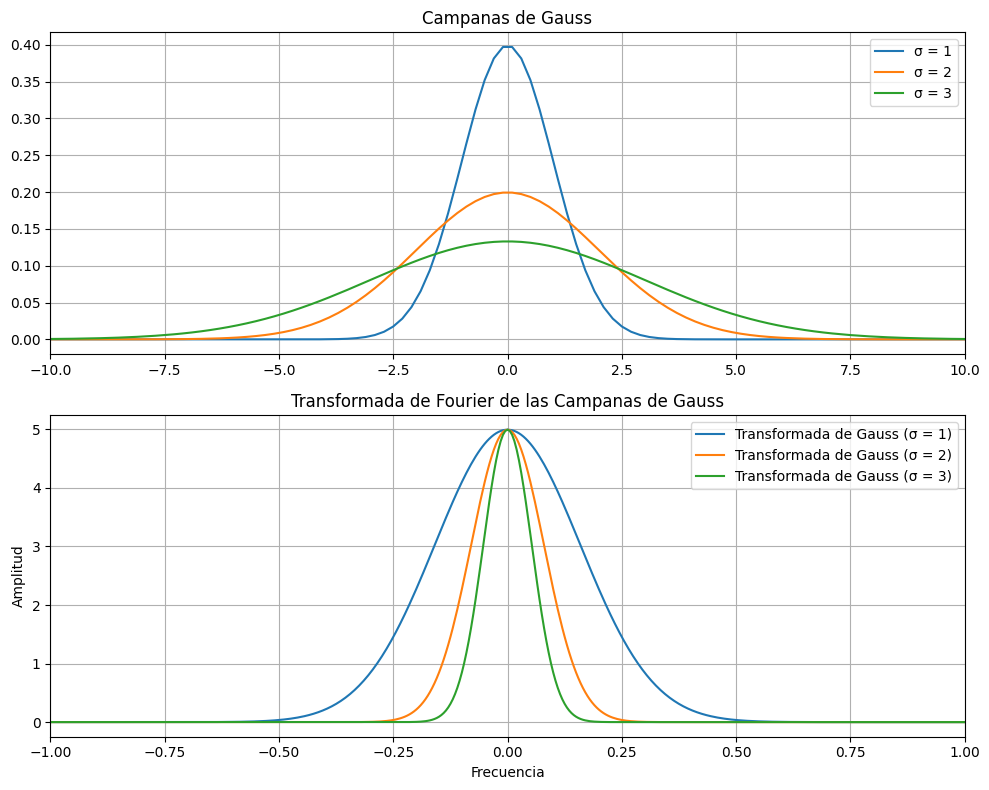

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift

# Definir la función de la campana de Gauss
def gaussian(x, mu, sigma):
    return (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu)/sigma)**2)

# Parámetros
x = np.linspace(-100, 100, 1000)  # Extender el rango de x para tener mejor resolución
mu = 0  # Media
sigma_values = [1, 2, 3]  # Tres desviaciones estándar

# Crear figura y subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Subplot 1: Graficar las campanas de Gauss
for sigma in sigma_values:
    y = gaussian(x, mu, sigma)
    ax1.plot(x, y, label=f"σ = {sigma}")
ax1.set_xlim([-10, 10])
ax1.set_title("Campanas de Gauss")
ax1.legend()
ax1.grid(True)

# Subplot 2: Transformada de Fourier de las campanas de Gauss centrada en el rango [-30, 30]
for sigma in sigma_values:
    y = gaussian(x, mu, sigma)
    y_fft = fftshift(fft(y))  # FFT y centrada
    freq = np.fft.fftshift(np.fft.fftfreq(len(y), x[1] - x[0]))  # Frecuencias correspondientes
    ax2.plot(freq, np.abs(y_fft), label=f"Transformada de Gauss (σ = {sigma})")

# Limitar el rango de frecuencias a [-30, 30]
ax2.set_xlim([-1, 1])
ax2.set_title("Transformada de Fourier de las Campanas de Gauss")
ax2.set_xlabel("Frecuencia")
ax2.set_ylabel("Amplitud")
ax2.legend()
ax2.grid(True)

# Mostrar gráficos
plt.tight_layout()
plt.show()



## 2. Transformada Corta de Fourier (STFT)

La **Transformada Corta de Fourier (STFT)** es una herramienta que nos permite analizar cómo varían las componentes frecuenciales de una señal a lo largo del tiempo. Para ello, se divide la señal en ventanas temporales, sobre las cuales se aplica la transformada de Fourier. Esto permite obtener una representación tiempo-frecuencia, comúnmente conocida como **espectrograma**. Matemáticamente, la STFT de una señal \( x(t) \) se define como:

\begin{equation}
X(\tau, \omega) = \int_{-\infty}^{\infty} x(t) w(t - \tau) e^{-j \omega t} \, dt
\end{equation}

donde \( w(t) \) es una función ventana que selecciona la porción de la señal a analizar. __NOTA:__ para


## 3. Ventaneo y su Importancia

El **ventaneo** es crucial en la STFT porque permite concentrar la señal en segmentos pequeños y manejables. La elección de la ventana afecta la resolución tanto en tiempo como en frecuencia, y es un compromiso entre ambas. Una ventana comúnmente usada es la ventana de Hamming, la cual se define como:

\begin{equation}
w(n) = 0.54 - 0.46 \cos\left( \frac{2 \pi n}{L-1} \right), \quad 0 \le n \le L-1
\end{equation}

Aplicar una ventana a la señal ayuda a reducir los efectos de **fugas espectrales** (leakage) que ocurren al analizar señales no periódicas. Sin embargo, esto también introduce una limitación en la resolución, la cual depende directamente del ancho de la ventana seleccionada.

## 4. Principio de Incertidumbre de Heisenberg aplicado a señales

El **principio de incertidumbre de Heisenberg** es bien conocido en la mecánica cuántica, pero también tiene una versión análoga en el procesamiento de señales. Este principio establece que existe un compromiso fundamental entre la resolución temporal y la resolución frecuencial de una señal. Es decir, no podemos obtener simultáneamente una alta precisión en el dominio del tiempo y en el dominio de la frecuencia.

### Definición

El principio de incertidumbre en señales se expresa matemáticamente de la siguiente manera:

\begin{equation}
\Delta t \cdot \Delta f \geq \frac{1}{4\pi}
\end{equation}

Donde:
- $\Delta t$ es la dispersión o la incertidumbre en el dominio del tiempo.
- $\Delta f$ es la dispersión o la incertidumbre en el dominio de la frecuencia.

Este principio sugiere que cuanto más precisa es la localización de una señal en el **tiempo**, mayor es la dispersión o incertidumbre en la **frecuencia**, y viceversa.

### Implicaciones en el análisis de señales

El principio de incertidumbre tiene implicaciones directas en el uso de la **Transformada Corta de Fourier (STFT)**, donde se utiliza el ventaneo para obtener información tanto en el tiempo como en la frecuencia. Al aplicar una ventana temporal corta, se puede observar con mayor detalle la evolución de la señal a lo largo del tiempo, pero a costa de una menor resolución en el dominio frecuencial.

Por el contrario, al utilizar ventanas largas, se mejora la precisión en la estimación de las frecuencias presentes en la señal, pero se pierde resolución en el tiempo.

### Ejemplo gráfico

Si aplicamos una ventana corta para realizar la STFT, obtenemos una buena localización en el tiempo, pero el espectro frecuencial se ensancha. Si aplicamos una ventana larga, el espectro frecuencial es más preciso, pero perdemos resolución temporal. Este compromiso es una manifestación del principio de incertidumbre de Heisenberg aplicado al procesamiento de señales.

Este principio es fundamental en el diseño y análisis de técnicas tiempo-frecuencia como los **espectrogramas** o la **wavelet transform**, ya que siempre existirá un balance entre la resolución temporal y frecuencial.

## 4. Conexión entre STFT, Ventaneo y Plancherel/Parseval

La STFT, al aplicar ventanas a segmentos temporales de la señal, permite observar cómo cambian las componentes frecuenciales en el tiempo, formando el **espectrograma**. Para garantizar que el análisis no distorsione la energía de la señal, aplicamos los teoremas de **Plancherel y Parseval**. Esto asegura que el análisis de la señal a través del espectro mantenga la misma energía que la señal original. Además, el uso adecuado del **ventaneo** nos ayuda a mejorar la interpretación tiempo-frecuencia, evitando la pérdida de información importante debido a las limitaciones del análisis de Fourier clásico.

Este laboratorio se enfocará en aplicar estos conceptos para obtener espectrogramas que nos permitan analizar señales complejas, entendiendo la distribución de la energía y los efectos del ventaneo.

## Ejemplo de espectrograma

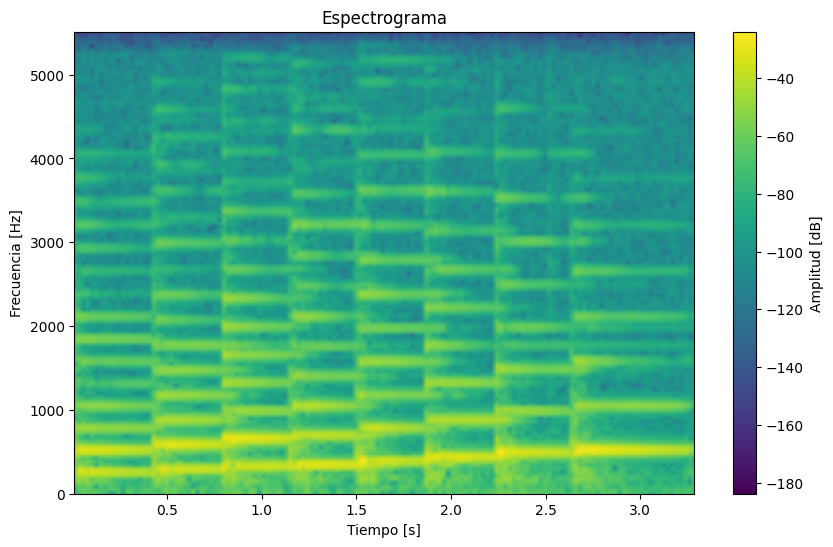

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram, get_window
from IPython.display import Audio

# Función para importar y reproducir el archivo de audio
def load_and_play_wav(filename):
    # Leer el archivo .wav
    sample_rate, signal = wavfile.read(filename)
    signal = signal.astype(np.float32)
    signal_norm = 2 * (signal - np.min(signal)) / (np.max(signal) - np.min(signal)) - 1

    # Reproducir el audio
    display(Audio(data=signal, rate=sample_rate))
    return sample_rate, signal_norm


# Función para graficar el espectrograma
def plot_spectrogram(signal, sample_rate, overlapping = 0., window_type='hann', window_size=256):
    """
    Genera y grafica el espectrograma de una señal.

    Parámetros:
    - signal: la señal de audio
    - window_type: el tipo de ventana a usar (string, por ejemplo 'hann', 'hamming', etc.)
    - window_size: tamaño de la ventana (entero)
    - overlapping: porcentaje de solapamiento (valor entre 0 y 1)
    - fs: frecuencia de muestreo de la señal
    """
    # Crear la ventana
    window = get_window(window_type, window_size)

    # Calcular el paso de la ventana en función del solapamiento
    noverlap = int(overlapping * window_size)

    # Calcular el espectrograma usando scipy.signal.spectrogram
    f, t, Sxx = spectrogram(signal, fs=sample_rate, window=window,
                            nperseg=window_size, noverlap=noverlap)


    # Graficar el espectrograma
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
    plt.title('Espectrograma')
    plt.ylabel('Frecuencia [Hz]')
    plt.xlabel('Tiempo [s]')
    plt.colorbar(label='Amplitud [dB]')
    plt.show()

# Cargar y reproducir el audio
sample_rate, signal = load_and_play_wav('./piano.wav')

# Graficar el espectrograma con una ventana de tipo 'hann' y tamaño 256
plot_spectrogram(signal, sample_rate, window_type='hann', window_size=256)


__NOTA: SEA EXPLICITO Y DETALLADO EN SUS RESPUESTAS. UTILICE LA TEORÍA VISTA EN CLASE PARA FUNDAMENTAR CORRECTAMENTE SUS ARGUMENTOS, INCLUYENDO FÓRMULAS, ECUACIONES, TRANSFORMACIONES Y CUALQUIER OTRO RECURSO NECESARIO PARA RESPALDAR SU RAZONAMIENTO. LA FUNDAMENTACIÓN ADECUADA Y PRECISA DE LAS RESPUESTAS SERÁ UN CRITERIO CLAVE EN LA EVALUACIÓN.__

## Ejercicio 1: ventanas (3 Puntos)
El objetivo de este ejercicio es comparar tres ventanas (Rectangular, Hamming y Hann) en los dominios del tiempo y de la frecuencia. Aprenderemos a observar cómo la elección de una ventana afecta la representación espectral de una señal.

Analice la función `plot_spectrogram` vista en clase y céntrece en la función `get_window`, la cual sirve para generar ventadas de diferentes tipo (Ver [SciPy/get_window](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.get_window.html)).

1. (0.75 Puntos) Genere las ventanas **Rectangular, Hamming y Hann** de tamaño $N=128$. Grafique las tres ventanas en el dominio del tiempo, asegurándose de que se grafican en el mismo eje para facilitar la comparación,es decir, una gráfica. __Pista:__ utiliza los nombres de ventanas `boxcar`, `hamming` y `hann` respectivamente (Ver [SciPy/get_window](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.get_window.html)).

2. (0.75 Puntos) Aplique la Transformada de Fourier **a las tres ventanas** y grafique las magnitudes de las transformadas. Compare visualmente los espectros de las tres ventanas, especialmente el lóbulo principal y los lóbulos secundarios. Comente sobre las diferencias observadas.

__Ayuda:__ Para agregarle resolución a la FFT, podemos utilizar *zero padding*, el cual veremos más adelante:
```
from scipy.fft import fft, fftshift
import numpy as np
zero_pad = 10000
window_fft = 10*np.log10(2/zero_pad*np.abs(fftshift(fft(window,zero_pad))))  
freqs = np.fft.fftshift(np.fft.fftfreq(zero_pad))
```
*Ejercicio alterno (no calificable)*: Prueba a cambiar el valor del zero padding para ver como cámbia la resolución de la FFT

3. (0.75 Puntos) Discuta cómo la forma de la ventana en el dominio del tiempo afecta su representación en el dominio de la frecuencia.

4. (0.75 Puntos) Analice cómo el ancho del lóbulo principal y la presencia de lóbulos secundarios afectan la representación espectral de una señal. ¿Qué ventana ofrece un mejor balance entre la resolución en frecuencia y la atenuación de los lóbulos secundarios?

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import get_window
from scipy.fft import fft, fftshift, fftfreq

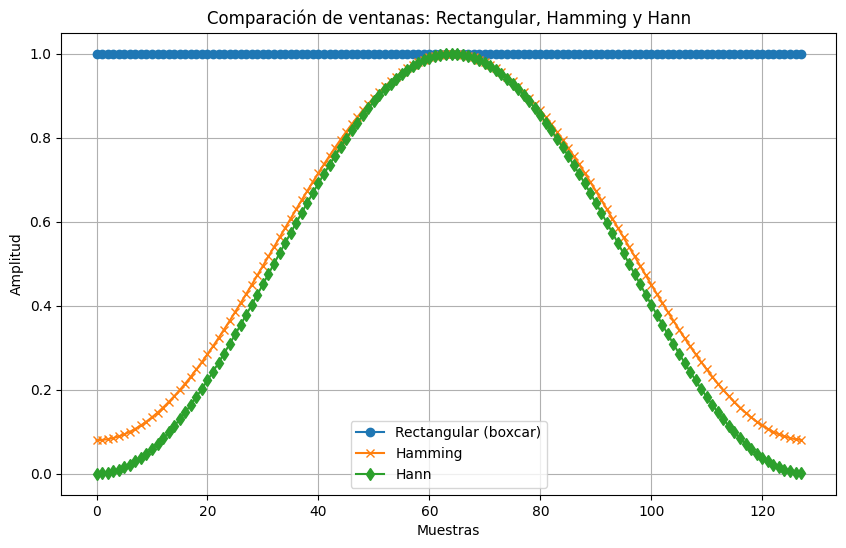

In [5]:
# Tamaño de la ventana
N = 128

# Generar las ventanas
rectangular_window = get_window('boxcar', N)
hamming_window = get_window('hamming', N)
hann_window = get_window('hann', N)

# Crear el eje de tiempo
n = np.arange(N)

# Graficar las ventanas
plt.figure(figsize=(10, 6))
plt.plot(n, rectangular_window, label='Rectangular (boxcar)', linestyle='-', marker='o')
plt.plot(n, hamming_window, label='Hamming', linestyle='-', marker='x')
plt.plot(n, hann_window, label='Hann', linestyle='-', marker='d')

# Configurar etiquetas y leyendas
plt.title('Comparación de ventanas: Rectangular, Hamming y Hann')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()


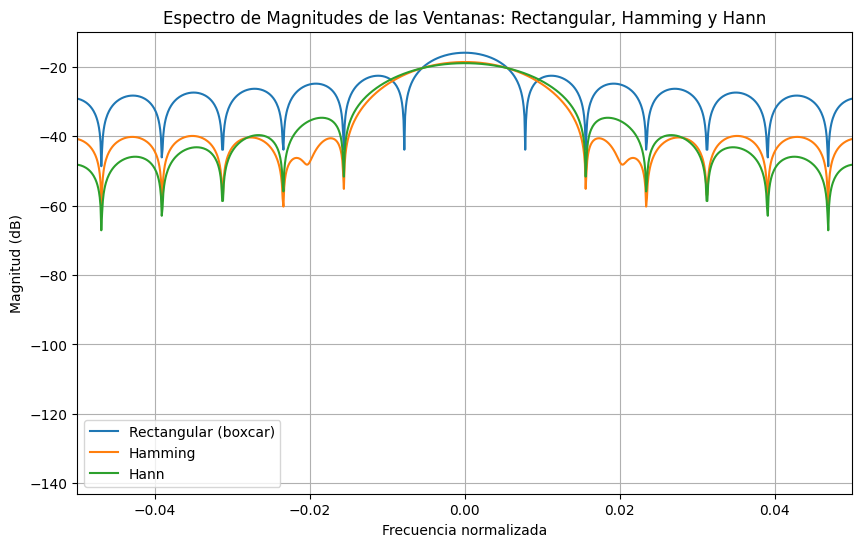

In [18]:
# Tamaño de la ventana y zero padding
N = 128
zero_pad = 10000

# Generar las ventanas
rectangular_window = get_window('boxcar', N)
hamming_window = get_window('hamming', N)
hann_window = get_window('hann', N)

# Aplicar la FFT con zero padding y evitar log10(0) agregando un pequeño valor epsilon
epsilon = 1e-10  # Valor pequeño para evitar log(0)
rectangular_fft = 10 * np.log10(2 / zero_pad * (np.abs(fftshift(fft(rectangular_window, zero_pad))) + epsilon))
hamming_fft = 10 * np.log10(2 / zero_pad * (np.abs(fftshift(fft(hamming_window, zero_pad))) + epsilon))
hann_fft = 10 * np.log10(2 / zero_pad * (np.abs(fftshift(fft(hann_window, zero_pad))) + epsilon))

# Generar las frecuencias correspondientes
freqs = fftshift(fftfreq(zero_pad))

# Graficar los espectros
plt.figure(figsize=(10, 6))
plt.plot(freqs, rectangular_fft, label='Rectangular (boxcar)')
plt.plot(freqs, hamming_fft, label='Hamming')
plt.plot(freqs, hann_fft, label='Hann')

# Configurar las etiquetas y la leyenda
plt.title('Espectro de Magnitudes de las Ventanas: Rectangular, Hamming y Hann')
plt.xlabel('Frecuencia normalizada')
plt.ylabel('Magnitud (dB)')
plt.legend()
plt.grid(True)
plt.xlim([-0.05, 0.05])  # Limitar el eje X para ver mejor el lóbulo principal
plt.show()

## Ejercicio 2: Espectrogramas (3 Puntos)
El objetivo de este ejercicio es entender cómo el tipo de ventana, el tamaño de la ventana y el solapamiento afectan la resolución tiempo-frecuencia en el espectrograma de dos señales de frecuencias cardíacas, una en reposo y otra durante el sueño. Vamos a explorar estos parámetros en detalle y relacionar sus efectos con el principio de incertidumbre de Heisenberg.

1. (0.5 Puntos) Visualice las dos señales en el dominio del tiempo. Graficar ambas señales y observe sus características. ¿Qué diferencias observa entre la señal en reposo y la señal durante el sueño?. Explique por qué el análisis en el dominio del tiempo puede ser insuficiente para comprender las características frecuenciales de las señales cardíacas, y justifique el uso del espectrograma.

2. (0.5 Puntos) Para ambas señales, calcule y visualice los espectrogramas utilizando tres tipos de ventanas: Rectangular, Hamming y Hann. Utilice un tamaño de ventana de 256 muestras y un solapamiento del 50%. Compare las resoluciones tiempo-frecuencia para cada tipo de ventana. ¿Cómo afectan los tipos de ventana la distribución de energía en el espectrograma y la aparición de componentes de frecuencia?

3. (0.5 Puntos) Utilizando la ventana de Hamming, analice el efecto de diferentes porcentajes de solapamiento: 0%, 50% y 75%. Mantenga el tamaño de la ventana en 256 muestras. Explique cómo el solapamiento afecta la suavidad del espectrograma y la capacidad de detectar cambios rápidos en el tiempo. Relacione estos resultados con el principio de incertidumbre de Heisenberg, explicando el compromiso entre la resolución temporal y frecuencial.

4. (0.5 Puntos) Para la señal en reposo, compare los espectrogramas utilizando una ventana de 128, 256 y 512 muestras. Utilice un solapamiento del 50% y la ventana de Hamming. Explique cómo el tamaño de la ventana afecta la resolución temporal y la resolución frecuencial. ¿Cómo varía la capacidad de detectar cambios rápidos en el tiempo conforme aumenta el tamaño de la ventana?

5. (0.5 Puntos) Discuta cuál es la mejor combinación de ventana, tamaño de ventana y solapamiento para analizar estas señales cardíacas. Justifique su elección basada en el balance entre resolución temporal y frecuencial, y el tipo de información que puede extraerse de los espectrogramas. ¿Hay alguna diferencia en la mejor combinación de parámetros para la señal en reposo frente a la señal durante el sueño? ¿Cómo afecta esto a la interpretación del estado de la señal cardíaca en diferentes momentos?

6. (0.5 Puntos)Analice los espectrogramas obtenidos con la mejor combinación de parámetros. ¿Qué patrones o características relevantes puede identificar en las señales cardíacas durante el reposo y el sueño? Compare las diferencias de frecuencia entre los dos estados (reposo y sueño). ¿Se observan cambios en las componentes de frecuencia durante el sueño que no son visibles en el reposo? Explique cómo estos cambios pueden estar relacionados con el estado del sistema cardiovascular durante el sueño.

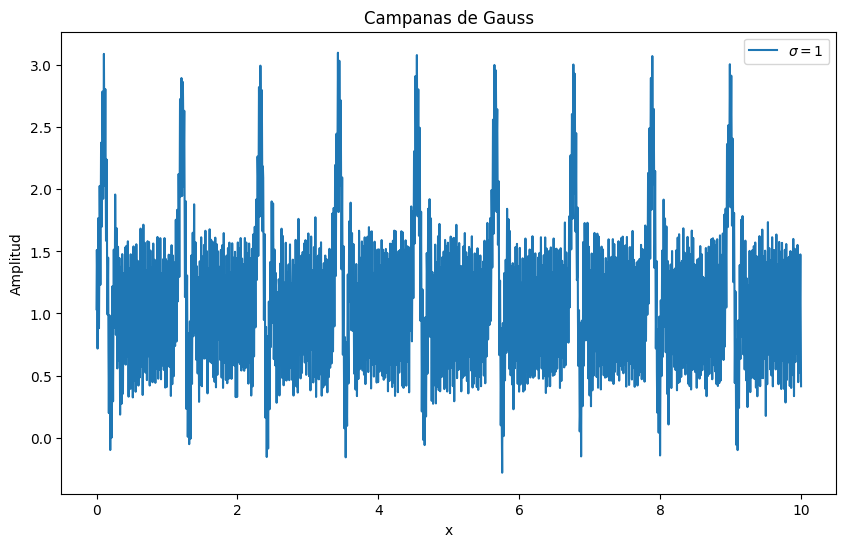

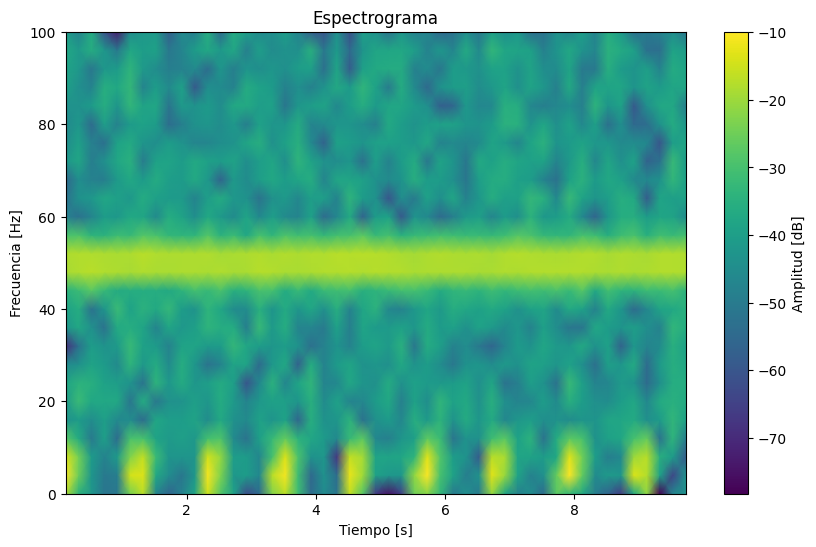

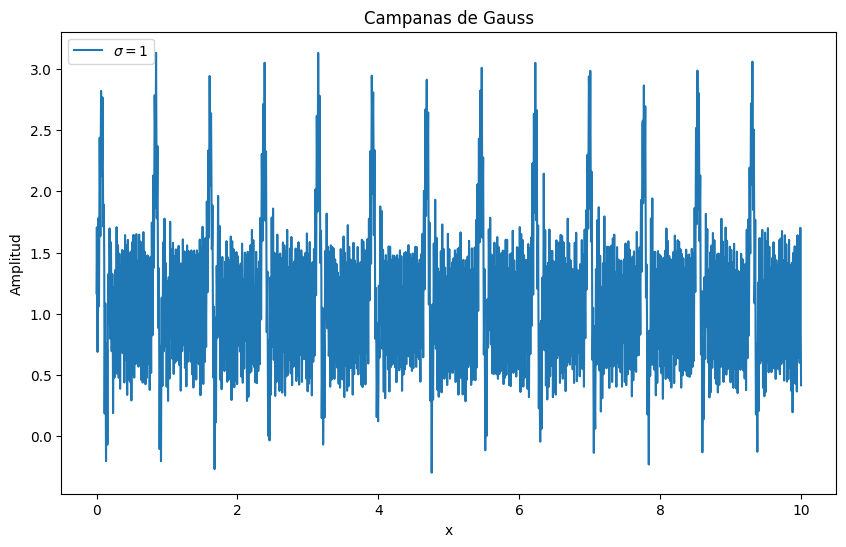

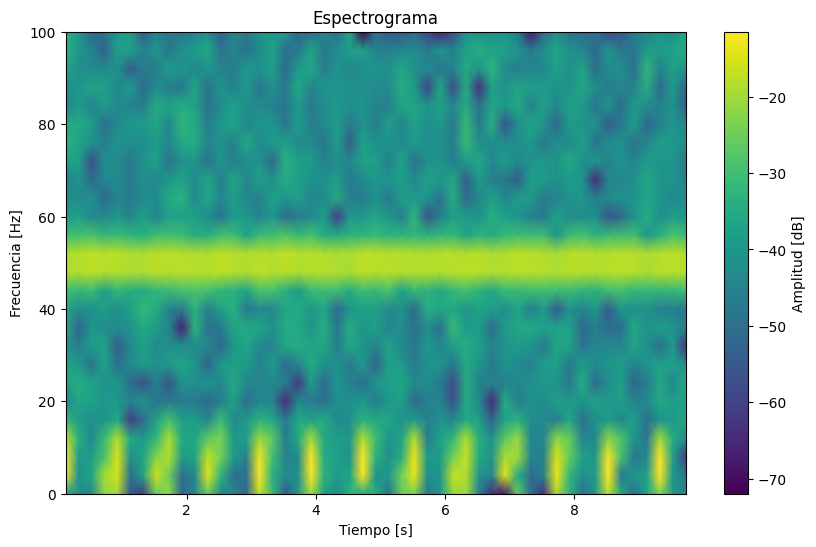

In [19]:
# Función para cargar una señal desde un archivo .txt
def load_signal_from_txt(filename, total_time = 10):
    # Cargar la señal desde el archivo .txt
    signal = np.loadtxt(filename, delimiter = ';')[0,:]

    fs = np.round(len(signal))/total_time
    # Retornar la señal cargada
    return signal, int(fs)

reposo, fs_reposo = load_signal_from_txt('./reposo.txt')

plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0,10,10*fs_reposo), reposo, label=r'$\sigma = 1$')
plt.title('Campanas de Gauss')
plt.xlabel('x')
plt.ylabel('Amplitud')
plt.legend()

plot_spectrogram(reposo, fs_reposo, overlapping = 0.2, window_type='hann', window_size=50)

sueno, fs_sueno = load_signal_from_txt('./sueno.txt')

plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0,10,10*fs_sueno), sueno, label=r'$\sigma = 1$')
plt.title('Campanas de Gauss')
plt.xlabel('x')
plt.ylabel('Amplitud')
plt.legend()

plot_spectrogram(sueno, fs_sueno, overlapping = 0.2, window_type='hann', window_size=50)

## Ejercicio 3. Respuesta de un sistema lineal e invariante en el tiempo.(1 punto)

Un equipo de investigación liderado por el Prof. Dr. Gary Glover (Stanford University, https://scholar.google.com/citations?user=aUWuwJ8AAAAJ&hl=es&oi=ao) pudo medir y caracterizar matemáticamente la respuesta del cerebro a una entrada de tipo impulso. Esta respuesta se denominó función de respuesta hemodinámica (HRF) y se modeló mediante la siguiente formulación matemática (ver figura y código más abajo):

\begin{equation}
h(t) = \left( \frac{t}{\tau_1} \right)^{\delta_1} \exp\left[ -\frac{\delta_1}{\tau_1} (t-\tau_1) \right] - c \left( \frac{t}{\tau_2} \right)^{\delta_2} \exp\left[ -\frac{\delta_2}{\tau_2} (t-\tau_2) \right],
\end{equation}

donde el conjunto de parámetros $\{\tau_1,\tau_2,\delta_1,\delta_2,c\}$ controla la forma de la HRF. Los valores de parámetros típicamente usados son $\{\tau_1=5.4,\tau_2=10.8,\delta_1=6,\delta_2=12,c=0.35\}$. Esta función es implementada en los software de análisis de Imágenes de Resonancia Magnética Funcional (fMRI), como por ejemplo SPM (http://www.fil.ion.ucl.ac.uk/spm/), FSL (https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/), AFNI (http://afni.nimh.nih.gov/afni/) y FMRISTAT (http://www.math.mcgill.ca/keith/fmristat/).

Suponiendo que el cerebro se comporta como un sistema lineal e invariante en el tiempo (LTI), se pide lo siguiente:

1. (0.5 Punto) Calcular la respuesta del cerebro ante entradas: pulso de 3 y 10 segundos de duración, sinusoide de 0.5 Hz.
2. (0.5 Punto) Generando dos entradas $e_1$ y $e_2$, verifique las condiciones que debe cumplir un sistema lineal e invariante en el tiempo.

__PISTA:__ utilizar la función de convolución,
```
signal.convolve(signal, filter, method='fft')
```




In [4]:
import numpy as np
import matplotlib.pyplot as plt

def hrf(t, tau1=5.4, delta1=6.0, tau2=10.8, delta2=12.0, c=0.35):
    ### COMPLETAR
    return h

TR = 1 # intervalo de muestreo
N_pts = 30 # número de puntos de la HRF
timeline = np.arange(0, N_pts, TR)
h = hrf(timeline)

plt.plot(timeline, h)
plt.xlabel('segundos')
plt.ylabel('amplitud')

TR = 1 # intervalo de muestreo
N_pts = 30 # número de puntos de la HRF
timeline = np.arange(0, N_pts, TR)

e1 = np.zeros(N_pts)
e1[10:13] = 1
e1[20:30] = 1

plt.stem(e1)


NameError: name 'h' is not defined